**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [178]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [179]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import KDTree

In [180]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        pr_y = np.zeros(X.shape[0], dtype=int)
        if self.algorithm == 'kd_tree':
            kdtree = KDTree(self.X, metric=self.metric)
            Y = kdtree.query(X, self.n_neighbors, return_distance=False)
        else:
            Y = sklearn.metrics.pairwise.pairwise_distances(X, self.X, metric=self.metric)
            Y = np.argpartition(Y, self.n_neighbors - 1, axis=1)[:, :self.n_neighbors]
        for i in range(X.shape[0]):
            for i in range(X.shape[0]):
                pr_y[i] = np.argmax(np.bincount(self.y[Y[i]]))
            return pr_y
        
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [181]:
iris = datasets.load_iris()

In [182]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [183]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [184]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [185]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [186]:
%time clf.fit(X_train, y_train)

CPU times: user 773 µs, sys: 148 µs, total: 921 µs
Wall time: 813 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [187]:
%time my_clf.fit(X_train, y_train)

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 13.1 µs


In [188]:
%time clf.predict(X_test)

CPU times: user 3.17 ms, sys: 2.24 ms, total: 5.41 ms
Wall time: 3.35 ms


array([2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2])

In [189]:
%time my_clf.predict(X_test)

CPU times: user 1.52 ms, sys: 1.09 ms, total: 2.61 ms
Wall time: 2.45 ms


array([2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [190]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [191]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [192]:
%time clf.fit(X_train, y_train)

CPU times: user 967 µs, sys: 650 µs, total: 1.62 ms
Wall time: 1.18 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [193]:
%time my_clf.fit(X_train, y_train)

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 15.7 µs


In [194]:
%time clf.predict(X_test)

CPU times: user 2.65 ms, sys: 1.15 ms, total: 3.8 ms
Wall time: 2.87 ms


array([2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0])

In [195]:
%time my_clf.predict(X_test)

CPU times: user 857 µs, sys: 548 µs, total: 1.41 ms
Wall time: 888 µs


array([2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0])

In [196]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [232]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [233]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [234]:
from sklearn.feature_extraction.text import CountVectorizer

In [249]:
vectorizer = CountVectorizer(max_df=0.1)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [236]:
#выборку можно разбить с помощью KFold
#в дальнейшем, для удобства подсчета score воспользуемся cross_val_score
from sklearn.model_selection import KFold, cross_val_score

In [237]:
kfold = KFold(n_splits=3, shuffle=True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

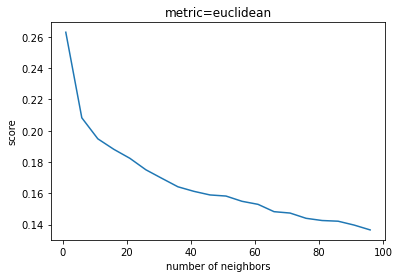

In [251]:
#metric='euclidean'
scores = []
for i in range(1, 100, 5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='euclidean')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())
    
plt.plot(range(1, 100, 5), scores)
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.title('metric=euclidean')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

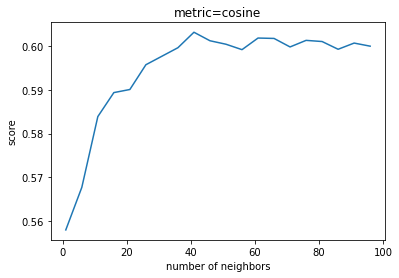

In [252]:
#metric='cosine'
scores = []
for i in range(1, 100, 5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())
    
plt.plot(range(1, 100, 5), scores)
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.title('metric=cosine')
plt.show()

In [253]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.1)
X = vectorizer.fit_transform(data)

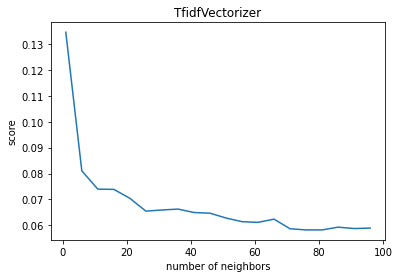

In [254]:
scores = []
for i in range(1, 100, 5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='euclidean')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())
    
plt.plot(range(1, 100, 5), scores)
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.title('TfidfVectorizer')
plt.show()

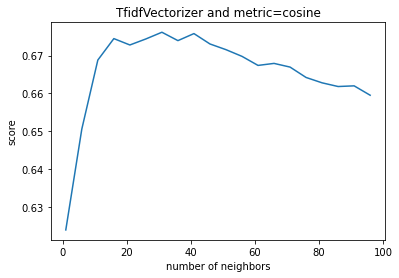

In [255]:
#metric='cosine' and TfidfVectorizer
scores = []
for i in range(1, 100, 5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
    score = cross_val_score(my_clf, X, target, cv=3, scoring='accuracy')
    scores.append(score.mean())
    
plt.plot(range(1, 100, 5), scores)
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.title('TfidfVectorizer and metric=cosine')
plt.show()

Лучше всего проявила себя третья модель (с метрикой cosine и TfidfVectorizer), метрика cosine в любом случае показывает результаты лучше euclidean

Оптимальное количество соседей = 30

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [256]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [257]:
test_data = newsgroups['data']
test_target = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [258]:
%%time
test_X = vectorizer.fit(data).transform(test_data)
my_clf = MyKNeighborsClassifier(n_neighbors=30, algorithm='brute', metric='cosine')
my_clf.fit(X, target)
print(accuracy_score(test_target, my_clf.predict(test_X)))

0.6334306956983536
CPU times: user 5.12 s, sys: 853 ms, total: 5.97 s
Wall time: 6.04 s


Результаты на тест-части оказались немного хуже, это связано с тем, что наборы слов в обучающей и тестовой выборках отличаются (до этого в fit и predict мы использовали данные из одной выборки)